# Assignment 1
### PHY408 Winter 26
### Jack Cheng 1010266695

In [2]:
print("hello to PHY408 wish me luck this sem")

hello to PHY408 wish me luck this sem


***

## Question 1

Download and load a dataset of daily temperature observations. Plot the observations in a figure with appropriate titles, axis labels, and legends.

(a) [1 point] Load the data using the numpy library and plot it using the matplotlib library. Add a title, labels and legends to the plot as needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

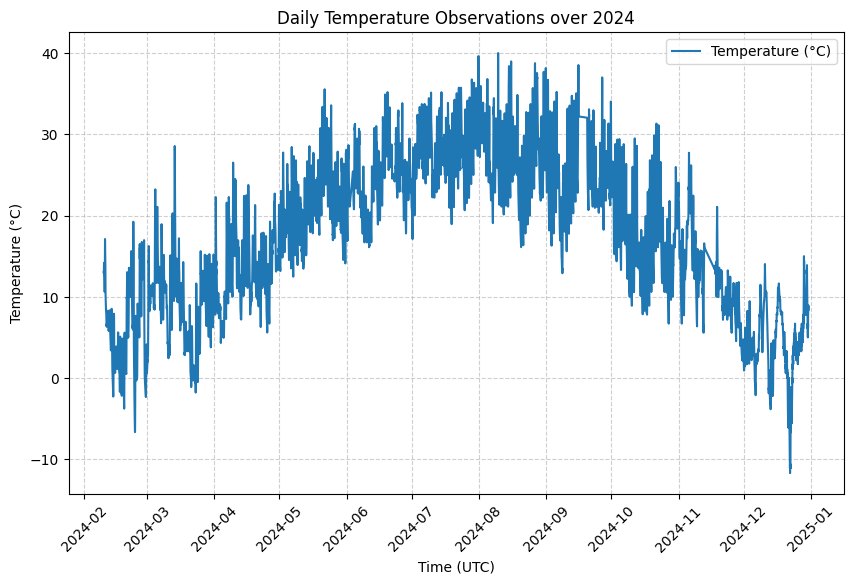

In [6]:
# Path to the dataset
file_path = 'data/sensor_mp8_temperature_2024.csv'

# Load the data using numpy
data = np.genfromtxt(file_path, delimiter=',', names=True, dtype=None, encoding='utf-8')

# Extracting values
temperatures = data['state']
timestamps_raw = data['last_changed']

# Convert ISO timestamps to datetime objects for accurate plotting
timestamps = [datetime.strptime(ts, "%Y-%m-%dT%H:%M:%S.%fZ") for ts in timestamps_raw]

plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, marker='', linestyle='-', color='tab:blue', label='Temperature (°C)')

plt.title('Daily Temperature Observations over 2024')
plt.xlabel('Time (UTC)')
plt.ylabel('Temperature (°C)')
plt.legend()

# Format x-axis
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

(b) [1 point] Load the data from the file using the pandas library and plot it using the seaborn library (you will probably still need numpy and matplotlib libraries). Add a title, labels and legends to the plot as needed.

In [7]:
import pandas as pd
import seaborn as sns

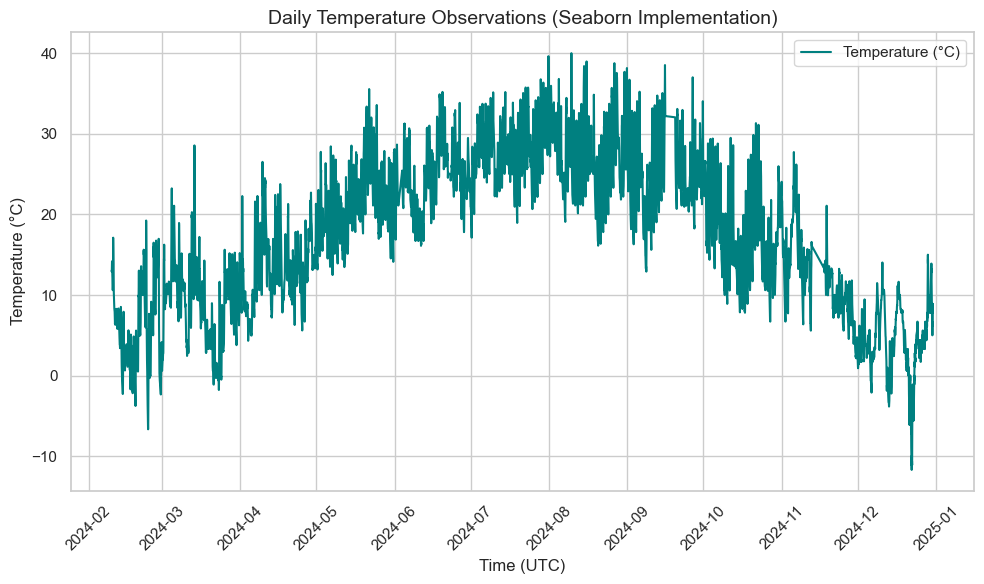

In [10]:
# 1. Load the data using pandas
# parse_dates automatically handles the ISO timestamp conversion for us
df = pd.read_csv('data/sensor_mp8_temperature_2024.csv', parse_dates=['last_changed'])

# 2. Set the visual style using seaborn
sns.set_theme(style="whitegrid")

# 3. Create the plot
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(
    data=df, 
    x='last_changed', 
    y='state', 
    marker='', 
    label='Temperature (°C)',
    color='teal'
)

# 4. Add titles and labels
plt.title('Daily Temperature Observations (Seaborn Implementation)', fontsize=14)
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# 5. Fine-tune formatting
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Save and show
plt.tight_layout()
plt.show()

***

## Question 2

(a) [2 points] Write a Python function to calculate the integral of a provided dataset using the Trapezium rule and Simpson’s rule. Test your code by generating the values for sin(t) function with 128 intervals from 0 to 180 degrees. Print the results from calling the function to calculate the integral.

(b) [2 points] The scipy library provides integral functions for Trapezium and Simpson’s rule. Calculate the integral of your generated sine dataset using these functions and print the results.

(c) [2 points] For each of the integrations functions above (Naive/Riemann, your 2 functions, 2 scipy functions), calculate the integral for a range of intervals from 8 to 1024 in powers of 2. Plot the integral value as a function of the number of intervals for each method on the same plot. Make each line identifiable, include a legend and appropriate axis labels and ticks.

***

## Question 3

The frequency of sampling data can affect any values derived from the data. In this question you will generate a sample of data from a cosine function and simulate the effect of coarse sampling and poor sampling.

(a) [2 points] Generate a sample of data $g (t) = cos(2πft)$ at a sampling interval of $dt = 1s$ for frequency values of $f = 0, 0.25, 0.5, 0.75, 1.0Hz$. In separate plots, plot the coarsely sampled g (t ) data as red circles, as well as a much higher resolution ‘ground truth’ $g (t)$ sampled with $d t = 0.05s$. For each frequency you test, comment on whether the coarse sampling captures the original dataset faithfully (define this!).

(b) [2 points] For each of the coarsely sampled datasets, calculate the average value over the entire dataset, and estimate the frequency and amplitude of the data. To estimate the frequency you can find the length of time the sampled data takes to repeat, and the apparent frequency will be related to the inverse of this time. What is the maximum frequency you can correctly sample with the sampling rate of $dt = 1s$?


(c) [2 points] For frequency values around your estimated maximum, generate new samples at $f = f_{max} − 0.1, f_{max} + 0.1$ and repeat part b. What are the estimated frequencies this time?